In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc

import Qubits

EC = 0.8
EJ = 10.0
T = 0.1
ng = 0

In [2]:
transmonC = Qubits.transmon_charge(20, EC, EJ, ng)#Values given in Ghz*hbar

transmonC.solve()

gamma_arr = transmonC.T_1_gamma()
print(str(gamma_arr) + "in GHZ")

print(str(1/gamma_arr) + "ns")
#"μs"
print(str(1/np.sum(gamma_arr)) + "ns")

[ 49.64277956 692.19246936 267.34362289]in GHZ
[0.02014392 0.00144468 0.0037405 ]ns
0.0009909046135678937ns


In [3]:
transmonF = Qubits.transmon_flux(200, EC, EJ, ng)#Values given in Ghz

transmonF.solve()

gamma_arr_flux = transmonF.T_1_gamma()
print(gamma_arr_flux)

print(1/gamma_arr_flux)
print(1/np.sum(gamma_arr_flux)*1e3)

[ 49.63633564 697.72201418 268.89754915]
[0.02014653 0.00143324 0.00371889]
0.9840041282970617


In [4]:
gatemonBeenakker = Qubits.gatemon_flux(200, EC, EJ, T, ng)
gatemonBeenakker.beenakker = True

gatemonBeenakker.solve()

gamma_gatemonBeenakker = gatemonBeenakker.T_1_gamma()

print(gamma_gatemonBeenakker)

print(1/gamma_gatemonBeenakker)
print(1/np.sum(gamma_gatemonBeenakker)*1e3)

[1.93774698e-02 5.46319312e-02 2.81768208e+02]
[5.16063247e+01 1.83043136e+01 3.54901643e-03]
3.548084492714762


In [5]:
gatemonF = Qubits.gatemon_flux(200, EC, EJ, T, ng)

gatemonF.solve()

gamma_gatemonF = gatemonF.T_1_gamma()

print(gamma_gatemonF)

print(1/gamma_gatemonF)
print(1/np.sum(gamma_gatemonF)*1e3)

[  0.69376285   1.00493911 222.36916601]
[1.44141474 0.99508517 0.00449703]
4.4629335258832645


In [6]:
gatemonC = Qubits.gatemon_charge(40, EC, EJ, T, ng)

gatemonC.solve()

gamma_gatemonC = gatemonC.T_1_gamma()

print(gamma_gatemonC)

print(1/gamma_gatemonC)
print(1/np.sum(gamma_gatemonC)*1e3)

[ 27.86473291  40.62397796 223.7310598 ]
[0.03588766 0.024616   0.00446965]
3.422081940847281


## Plots

In [17]:
T_arr = np.linspace(0, 1, 100)
beta_arr = np.linspace(5, 100, 100)
N_flux = 60
N_charge = 30

transmonPlot = Qubits.transmon_charge(N_charge, 1, 1, 0)
BeenakkerPlot = Qubits.gatemon_flux(N_flux, 1, 1, 0.1, 0)
BeenakkerPlot.beenakker = True
AverinPlot = Qubits.gatemon_charge(N_charge, 1, 1, 0.1, 0)


#### As a function of T

In [20]:
four_beta = np.array([1, 10, 50 , 100])

T_result_transmon = np.zeros((len(four_beta), 2))
T_result_beenaker = np.zeros((len(four_beta), len(T_arr), 2))
T_result_Averin = np.zeros((len(four_beta), len(T_arr), 2))


for i in range(len(four_beta)):
    transmonPlot.EC = 1/four_beta[i]
    BeenakkerPlot.EC = 1/four_beta[i]
    AverinPlot.EC = 1/four_beta[i]

    transmonPlot.solve()

    transmonGamma = transmonPlot.T_1_gamma()
    T_result_transmon[i,:] = 1/transmonGamma

    for j in range(len(T_arr)):
        BeenakkerPlot.T = T_arr[j]
        AverinPlot.T = T_arr[j]

        BeenakkerPlot.solve()
        AverinPlot.solve()

        beenakkerGamma =  BeenakkerPlot.T_1_gamma()
        averinGamma =  AverinPlot.T_1_gamma()

        T_result_beenaker[i, j, :] = 1/beenakkerGamma
        T_result_Averin[i, j, :] = 1/averinGamma
        
        

C:\Users\marku\AppData\Local\Temp\ipykernel_21316\2088637950.py:29: RuntimeWarning: divide by zero encountered in divide
  T_result_Averin[i, j, :] = 1/averinGamma


The solid line is 1/f charge noise, the dashed line is the ohmic charge noise and the dashed/dotted is the dielectric loss.
Blue is the transmon, green is Beenakker and orange is Averin


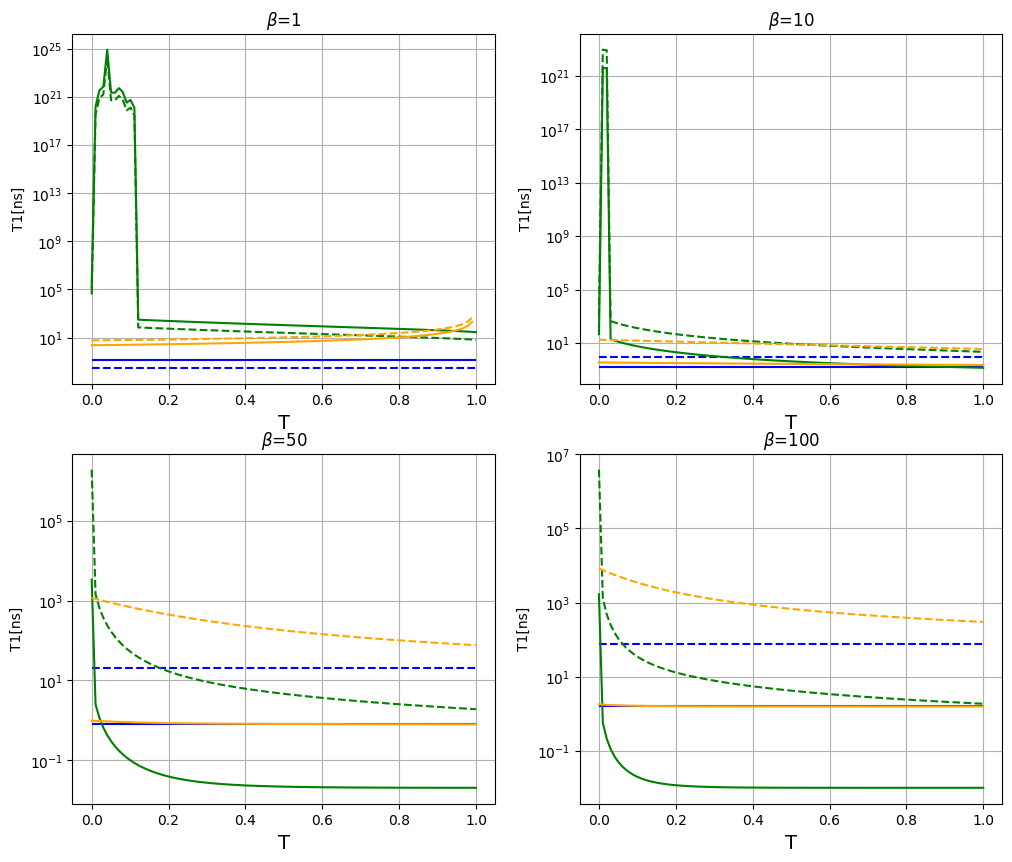

In [27]:
fig_beta, ax_beta = plt.subplots(2,2, figsize=(12,10))

print("The solid line is 1/f charge noise, the dashed line is the ohmic charge noise and the dashed/dotted is the dielectric loss.")
print("Blue is the transmon, green is Beenakker and orange is Averin")

for m in range(2):
    for n in range(2):
        beta = four_beta[n + m*2]

        #The three T1 times for the transmon
        ax_beta[m, n].hlines(T_result_transmon[n + m*2, 0], 0, 1, color = "blue")
        ax_beta[m, n].hlines(T_result_transmon[n + m*2, 1], 0, 1, linestyle = '--', color = "blue")

        #The three T1 times for Beenakker model
        ax_beta[m, n].plot(T_arr, T_result_beenaker[n + m*2, :, 0], color = "green")
        ax_beta[m, n].plot(T_arr, T_result_beenaker[n + m*2, :, 1], "--", color = "green")

        #The three T1 times for Averin
        ax_beta[m, n].plot(T_arr, T_result_Averin[n + m*2, :, 0], color = "orange")
        ax_beta[m, n].plot(T_arr, T_result_Averin[n + m*2, :, 1], "--", color = "orange")


        ax_beta[m, n].set(title = r"$\beta$="+str(four_beta[n + m*2]), xlabel = r"T", ylabel = "T1[ns]", yscale = "log")
        ax_beta[m, n].grid()
        ax_beta[m, n].xaxis.label.set_size(14)


